In [1]:
#importing libraries
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential 
from keras.layers import Convolution2D ,MaxPooling2D, Flatten, Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers import BatchNormalization
import shutil
import random
import os
import numpy as np

Using TensorFlow backend.


In [2]:
#initialise the CNN model with different layers(used sequential): 3 layers
model = Sequential()
# Note the input shape is the desired size of the image 300x300 with 3 bytes color
# Step 1
model.add(Convolution2D(16,3,3, input_shape=(500, 500, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#step 2 Convolution- learn features: put convolution filter on input(5X5) to get tensor output
model.add(Convolution2D(32,3,3, activation="relu"))

#step 3 Normalize the activations of the previous layer at each batch to increase stability and performance 
#model.add(BatchNormalization())

#step 4 reduce spatial dimension 
model.add(MaxPooling2D(pool_size =(2,2)))

#step 5 learn more features with activation function 'relu'to introduce non-lineraity (& avoid overfitting )
model.add(Convolution2D(64, 3, 3, activation = 'relu'))

#step 6 reduce spatial dimension
model.add(MaxPooling2D(pool_size=(2,2)))

#step 7 multidimensional to linear output
model.add(Flatten())

#step 8 connect every input to every output by weights (dot product)
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

In [3]:
#loss function is default for multi-classification problem  
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics = ['accuracy'])

In [4]:
#augmentation configuration for training and testing 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [5]:
# used this code when I manually put images in folder train under CHEST_xrxay/train.
#now has to be done ramdomly with code because manually picking images to train etc is not good
# Can comment out if need be
#32
training_set = train_datagen.flow_from_directory('CHEST_xray/train',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 2032 images belonging to 3 classes.


In [6]:
#used this code when I manually put images in folder train under CHEST_xrxay/validate
#now has to be done ramdomly with code because manually picking images is not good
# Can comment out if need be
validation_set = test_datagen.flow_from_directory('CHEST_xray/validate',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 726 images belonging to 3 classes.


In [7]:
history=model.fit_generator(training_set,epochs =30,steps_per_epoch=62 ,validation_data = validation_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
62/62 [==============================] - 145s 2s/step - loss: 0.9546 - accuracy: 0.4751 - val_loss: 0.9013 - val_accuracy: 0.6019
Epoch 2/30
62/62 [==============================] - 138s 2s/step - loss: 0.9075 - accuracy: 0.4883 - val_loss: 0.8921 - val_accuracy: 0.6708
Epoch 3/30
62/62 [==============================] - 140s 2s/step - loss: 0.8985 - accuracy: 0.5122 - val_loss: 0.8854 - val_accuracy: 0.5978
Epoch 4/30
62/62 [==============================] - 143s 2s/step - loss: 0.8860 - accuracy: 0.5473 - val_loss: 0.8762 - val_accuracy: 0.6336
Epoch 5/30
62/62 [==============================] - 140s 2s/step - loss: 0.8781 - accuracy: 0.5574 - val_loss: 0.8630 - val_accuracy: 0.7755
Epoch 6/30
62/62 [==============================] - 143s 2s/step - loss: 0.8639 - accuracy: 0.5892 - val_loss: 0.8452 - val_accuracy: 0.7094
Epoch 7/30
62/62 [==============================] - 176s 3s/step - loss: 0.857

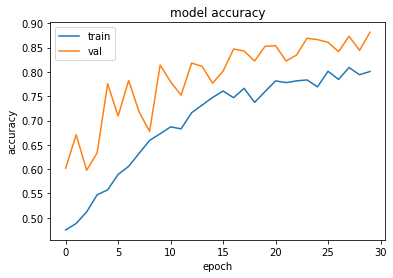

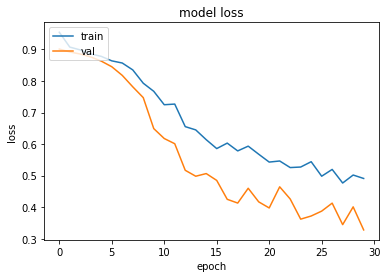

In [8]:
#validation set :Its purpose is to track progress through validation loss and accuracy.
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
test_set = test_datagen.flow_from_directory('CHEST_xray/test',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical', shuffle= False)




Found 147 images belonging to 3 classes.


In [11]:
#224
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc
subfolders=["covid", "normal", "viral_pneumonia"]

# loop over images/files in the subfolders of the test folder
#actual_list=[]
prediction_list=[]
count_covid=0
count_normal=0
count_viral_pneumonia=0
for actual in subfolders:
    src_dir='CHEST_xray/test/'+actual
    files=os.listdir(src_dir) 
    print(len(files))
    
    
    
    for file in files:
        if file !="Thumbs.db":
            

            
                
            src_file_path=os.path.join(src_dir, file)
            #print(src_file_path)
            test_image = image.load_img(src_file_path, target_size = (500, 500))
            test_image = image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis = 0)
            result = model.predict(test_image)
            #print(result)
            training_set.class_indices
            #capturing prediction in an array
            if int(result[0][0])==1:
                prediction = 'Covid'
                prediction_list.append(2)
                               
            
            elif int(result[0][1])==1:
                prediction = 'Normal'
                prediction_list.append(0)
                
                
         
                
            elif int(result[0][2])==1:
                
                prediction = 'Viral Pneumonia'
                prediction_list.append(1)
 
            else:
                continue
                        # capturing actual in an array    
            if actual=="covid":
          
                count_covid +=1
            
            elif actual=="normal":
         
                count_normal +=1
           
            elif actual=="viral_pneumonia":
                count_viral_pneumonia +=1
      
            print(prediction)

actual_list=[2]*count_covid+[0]*count_normal+[1]*count_viral_pneumonia
print(len(actual_list))
print(len(prediction_list))
print(count_covid, count_normal, count_viral_pneumonia)
# calculate metrics
print(accuracy_score(actual_list, prediction_list))
print(precision_score (actual_list, prediction_list, average= 'macro',zero_division="warn"))
print(recall_score (actual_list, prediction_list, average='macro'))
#print(roc_auc_score (actual_list, prediction_list, average='None')) 
print(confusion_matrix(actual_list, prediction_list)) 


#print(confusion_matrix (actual_list, prediction_list))    

11
Normal
Covid
Viral Pneumonia
Viral Pneumonia
Covid
Viral Pneumonia
Covid
Covid
Covid
Viral Pneumonia
68
Viral Pneumonia
Normal
Normal
Normal
Normal
Viral Pneumonia
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Viral Pneumonia
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Viral Pneumonia
Normal
Normal
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Normal
Normal
68
Normal
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Vir

In [12]:
#224
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc
subfolders=["covid", "normal", "viral_pneumonia"]

# loop over images/files in the subfolders of the test folder
#actual_list=[]
prediction_list=[]
count_covid=0
count_normal=0
count_viral_pneumonia=0
for actual in subfolders:
    src_dir='CHEST_xray/test/'+actual
    files=os.listdir(src_dir) 
    print(len(files))
    for file in files:
    
        src_file_path=os.path.join(src_dir, file)
        #print(src_file_path)
        test_image = image.load_img(src_file_path, target_size = (500, 500))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict_classes(test_image)
        #print(result)
        training_set.class_indices
        #capturing prediction in an array
        if result[0]==0:
            #prediction = 'Covid'
            prediction_list.append(2)
                               
            
        elif result[0]==1:
                #prediction = 'Normal'
                prediction_list.append(0)
                
                
         
                
        elif result[0]==2:
                
                #prediction = 'Viral Pneumonia'
                prediction_list.append(1)
 
        else:
            pass
                        # capturing actual in an array    
        if actual=="covid":
          
                count_covid +=1
            
        elif actual=="normal":
         
                count_normal +=1
           
        elif actual=="viral_pneumonia":
                count_viral_pneumonia +=1
        else:
            pass
            #print(prediction)

actual_list=[2]*count_covid+[0]*count_normal+[1]*count_viral_pneumonia
print(len(actual_list))
print(len(prediction_list))
print(count_covid, count_normal, count_viral_pneumonia)
# calculate metrics
print(accuracy_score(actual_list, prediction_list))
print(precision_score (actual_list, prediction_list, average= 'macro'))
print(recall_score (actual_list, prediction_list, average='macro'))
#print(roc_auc_score (actual_list, prediction_list, average='None')) 
print(confusion_matrix(actual_list, prediction_list)) 


   




11
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
68
68
147
147
11 68 68
0.8299319727891157
0.8828042328042328
0.7250445632798574
[[59  9  0]
 [10 58  0]
 [ 1  5  5]]
